[Pythonで別ファイルの関数を実行する方法を現役エンジニアが解説【初心者向け】](https://techacademy.jp/magazine/22727)

In [26]:
import pandas as pd, numpy as np
import re
import MeCab
import fasttext
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import japanize_matplotlib
import utility as util

In [21]:
wakati = util.wakati
M2A = util.MecabMorphologicalAnalysis
YN = util.YahooNews
cos_sim = util.cos_sim

In [22]:
df = YN(1000)

[======              ] 130記事

KeyboardInterrupt: 

In [3]:
path = "/work/data/BunshuOnline/"
df = pd.read_csv(path + 'YahooNews.csv')
df

,title,category,text
0,損? あざとかわいい吉岡里帆,エンタメ,女優吉岡里帆27の2年ぶり2冊目の写真集里帆採取 by Asami Kiyokawa集英社...
1,鬼滅の「聖地」潤う観光地,経済,コロナ禍にもかかわらず異例の大ヒットを記録している劇場版鬼滅の刃 無限列車編映画にとどまらず...
2,電通G コロナで営業利益半減,経済,電通グループが10日発表した2020年19月期連結決算国際会計基準は売上高に当たる収益が9...
3,香港民主派議員、全員辞職,国際,12 北京共同新華社電によると中国の全人代常務委員会会議は11日香港立法会定数70の議員資格...
4,専門家組織 全国的に感染増加,国内,新型コロナウイルス対策を助言する厚生労働省の専門家組織アドバイザリーボードの会合が11日開...
...,...,...,...
512,ホワイトハウス周辺で4人刺傷,国際,米NBCテレビなどによると米大統領選でトランプ大統領とバイデン前副大統領の双方の支持者が集...
513,一方的な勝利宣言 米の反応は,国際,FNNプライムオンラインアメリカ大統領選挙の投票日から一夜明けた4日午前10時前のワシントン...
514,NY株続伸、一時600ドル超高,国際,ニューヨーク時事開票作業が進む米大統領選でトランプバイデン両候補の大接戦が続く中4日午前の...
515,セガサミー ゲーセン運営撤退,経済,セガサミーホールディングスは4日娯楽施設を運営する連結子会社セガエンタテインメント東京の株...


In [4]:
cat_lst = [cat for cat in df.category]
text_lst = [M2A(text, mecab=wakati) for text in df.text]

text_train, text_valid, cat_train, cat_valid = train_test_split(
    text_lst, cat_lst, test_size=0.2, random_state=0, stratify=cat_lst
)

with open('./news.train', mode='w') as f:
    for i in range(len(text_train)):
        f.write(text_train[i])
        
with open('./news.valid', mode='w') as f:
    for i in range(len(text_valid)):
        f.write(text_valid[i])

In [5]:
model = fasttext.train_unsupervised('./news.train', minn=2, maxn=5, dim=300)

In [6]:
cat_valid[:10]

['経済', '経済', 'スポーツ', '経済', '国際', '国際', 'ライフ', '経済', '経済', '国内']

In [7]:
text_train[:10]

['西武鉄道 は 2020年 11月9日 月 終電 の 繰り上げ を 中心 と し た ダイヤ改正 を 2021年 春に 実施 する と 発表 し まし た 実施 路線 は 山口 線 と 多摩川線 を 除く 全線 です 主要 路線 の 終電 を 上下線 と も 概ね 2030 分 繰り上げ ます 西武鉄道 が 検討 し て いる 終電 繰り上げ の 時刻 は 次 の とおり ● 池袋線 池袋駅 の 平日 下り 飯能 行 現行 0時 09 分 発 → 改正 後 23時 52分 発 小手指 行 0時 44分 発 → 0時 14分 発 保谷 行 0時 45分 発 → 0時 18分 発 ● 新宿線 高田馬場駅 の 平日 下り 本 川越 行 拝島 行き に 接続 0時 01 分 発 → 23時 46分 発 新所沢 行 0時 47分 発 → 0時 18分 発 上石神井 行 0時 50分 発 → 0時 20分 発 平日 下り の ほか 上り や 土 休日 も 終電 時刻 が 変更 さ れる 予定 です 一方 で 初 電 の 繰り下げ は 計画 さ れ て い ませ ん なお 時刻 は 検討 中 で あり 今後 変わる 場合 が ある と いい ます 詳細 は 2021年 1月 頃 に 発表 さ れる 予定 です 西武鉄道 に よる と 終電 繰り上げ の 目的 や 背景 として 現在 23時間 程度 しか ない 夜間 作業時間 の 拡大 や 新型コロナウイルス 感染拡大 の 影響 で 特に 深夜 の 利用 が 減っ て いる こと を 挙げ て い ます 深夜 の 利用 に関して は コロナ 前 の 2019年 11月 と 比較 する と 直近 2020年 10月 12週 の 23時 以降 の 利用者 は 56 割 程度 に まで 減っ て いる という こと です 乗りものニュース 編集部 \n',
 '〈 人間 スクランブル かごしま 法廷 傍聴 記 〉 あなた は 息子 の 悪い ところ ばかり を 言っ て いる いい ところ は あり ませ ん でし た か 精神疾患 を 抱え た 50代 の 息子 を 刺し殺し た として 殺人 の 罪 に 問わ れ た 70代 の 男 は 検察官 から 取り調べ を 受け た 際 に 掛け られ た 言葉 を 口 に し むせび泣い

In [8]:
vectors = []
for t in text_train:
    vectors.append(model.get_sentence_vector(t.strip()))

In [9]:
vectors = np.array(vectors)
labels = np.array(cat_train)

In [10]:
ss = preprocessing.StandardScaler()
vectors_std = ss.fit_transform(vectors)

In [11]:
pca = PCA()
pca.fit(vectors_std)
feature = pca.transform(vectors_std)
feature = feature[:, :2]

In [12]:
labels

array(['経済', '地域', '国内', '国際', '経済', '国内', '国際', 'エンタメ', '国際', '国内', '科学',
       '国際', 'エンタメ', '国内', '国内', '国際', 'エンタメ', '国際', '国際', '地域', '国内',
       '国内', '国内', 'スポーツ', 'エンタメ', 'エンタメ', '地域', 'スポーツ', '経済', '地域', '国内',
       '国際', 'スポーツ', '地域', '国際', 'エンタメ', '国際', '経済', '国際', '国内', '地域',
       '国際', '国際', '経済', '国内', 'スポーツ', '国内', 'エンタメ', '国際', 'エンタメ', '国内',
       '国内', 'スポーツ', '国際', '国際', '国内', 'エンタメ', 'ライフ', 'スポーツ', '国際',
       'エンタメ', 'エンタメ', 'スポーツ', '国内', 'スポーツ', '国際', '国際', '国際', '国内',
       'スポーツ', '国際', '国内', '国際', 'スポーツ', 'スポーツ', '国際', 'エンタメ', 'スポーツ',
       '経済', '国際', '地域', '国内', '経済', 'スポーツ', '国内', '国際', '国際', '国際', '国内',
       '国内', '国内', '経済', 'スポーツ', 'エンタメ', '国内', 'エンタメ', '経済', '国内', '経済',
       '地域', '地域', '国際', '国際', '経済', '経済', 'スポーツ', '経済', 'スポーツ', 'スポーツ',
       '国際', 'スポーツ', 'スポーツ', '国際', 'エンタメ', 'エンタメ', '経済', 'エンタメ', '国内',
       '国内', '国際', '国内', '国際', '経済', '国際', '科学', 'エンタメ', '国際', '地域', '国際',
       '国際', '経済', '国内', 'スポーツ', 'スポーツ', 'エンタメ', '経済', '国内',

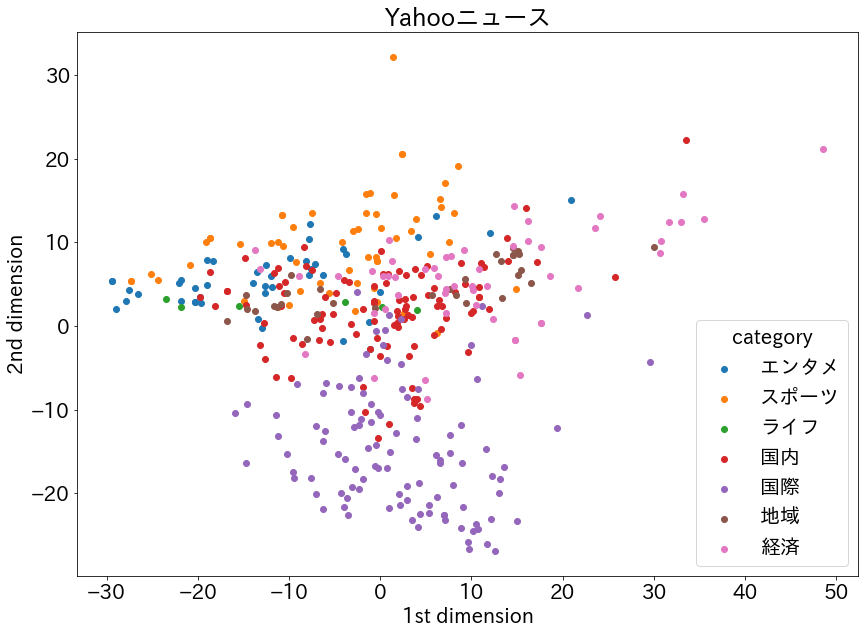

In [13]:
x0, y0 = feature[labels=='エンタメ', 0], feature[labels=='エンタメ', 1]
x1, y1 = feature[labels=='スポーツ', 0], feature[labels=='スポーツ', 1]
x2, y2 = feature[labels=='ライフ', 0], feature[labels=='ライフ', 1]
x3, y3 = feature[labels=='国内', 0], feature[labels=='国内', 1]
x4, y4 = feature[labels=='国際', 0], feature[labels=='国際', 1]
x5, y5 = feature[labels=='地域', 0], feature[labels=='地域', 1]
x6, y6 = feature[labels=='経済', 0], feature[labels=='経済', 1]


plt.figure(figsize=(14, 10))
plt.rcParams["font.size"]=20
plt.scatter(x0, y0, label="エンタメ")
plt.scatter(x1, y1, label="スポーツ")
plt.scatter(x2, y2, label="ライフ")
plt.scatter(x3, y3, label="国内")
plt.scatter(x4, y4, label="国際")
plt.scatter(x5, y5, label="地域")
plt.scatter(x6, y6, label="経済")
plt.title("Yahooニュース")
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.legend(title="category")
plt.show()

In [14]:
vectors = []
for t in text_valid:
    vectors.append(model.get_sentence_vector(t.strip()))

In [15]:
vectors = np.array(vectors)
labels = np.array(cat_valid)

In [16]:
ss = preprocessing.StandardScaler()
vectors_std = ss.fit_transform(vectors)

In [17]:
pca = PCA()
pca.fit(vectors_std)
feature = pca.transform(vectors_std)
feature = feature[:, :2]

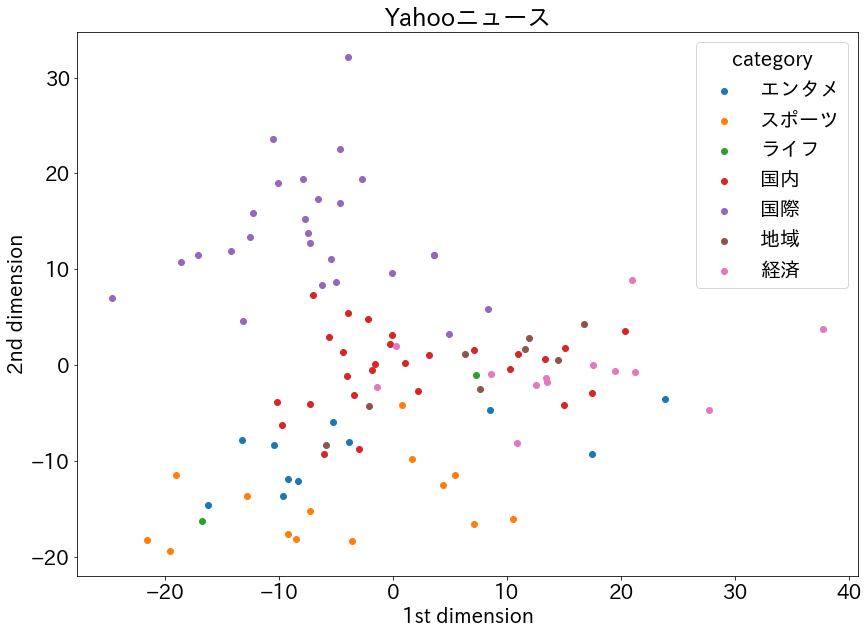

In [18]:
x0, y0 = feature[labels=='エンタメ', 0], feature[labels=='エンタメ', 1]
x1, y1 = feature[labels=='スポーツ', 0], feature[labels=='スポーツ', 1]
x2, y2 = feature[labels=='ライフ', 0], feature[labels=='ライフ', 1]
x3, y3 = feature[labels=='国内', 0], feature[labels=='国内', 1]
x4, y4 = feature[labels=='国際', 0], feature[labels=='国際', 1]
x5, y5 = feature[labels=='地域', 0], feature[labels=='地域', 1]
x6, y6 = feature[labels=='経済', 0], feature[labels=='経済', 1]


plt.figure(figsize=(14, 10))
plt.rcParams["font.size"]=20
plt.scatter(x0, y0, label="エンタメ")
plt.scatter(x1, y1, label="スポーツ")
plt.scatter(x2, y2, label="ライフ")
plt.scatter(x3, y3, label="国内")
plt.scatter(x4, y4, label="国際")
plt.scatter(x5, y5, label="地域")
plt.scatter(x6, y6, label="経済")
plt.title("Yahooニュース")
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.legend(title="category")
plt.show()